In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 200
learning_rate = 0.001


In [3]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [8]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [9]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/200], Loss: 10.4640
Epoch [10/200], Loss: 4.4063
Epoch [15/200], Loss: 1.9520
Epoch [20/200], Loss: 0.9576
Epoch [25/200], Loss: 0.5546
Epoch [30/200], Loss: 0.3912
Epoch [35/200], Loss: 0.3248
Epoch [40/200], Loss: 0.2977
Epoch [45/200], Loss: 0.2866
Epoch [50/200], Loss: 0.2819
Epoch [55/200], Loss: 0.2798
Epoch [60/200], Loss: 0.2788
Epoch [65/200], Loss: 0.2783
Epoch [70/200], Loss: 0.2779
Epoch [75/200], Loss: 0.2775
Epoch [80/200], Loss: 0.2772
Epoch [85/200], Loss: 0.2770
Epoch [90/200], Loss: 0.2767
Epoch [95/200], Loss: 0.2764
Epoch [100/200], Loss: 0.2761
Epoch [105/200], Loss: 0.2758
Epoch [110/200], Loss: 0.2756
Epoch [115/200], Loss: 0.2753
Epoch [120/200], Loss: 0.2750
Epoch [125/200], Loss: 0.2747
Epoch [130/200], Loss: 0.2745
Epoch [135/200], Loss: 0.2742
Epoch [140/200], Loss: 0.2739
Epoch [145/200], Loss: 0.2737
Epoch [150/200], Loss: 0.2734
Epoch [155/200], Loss: 0.2731
Epoch [160/200], Loss: 0.2729
Epoch [165/200], Loss: 0.2726
Epoch [170/200], Loss: 0.2723

In [11]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()


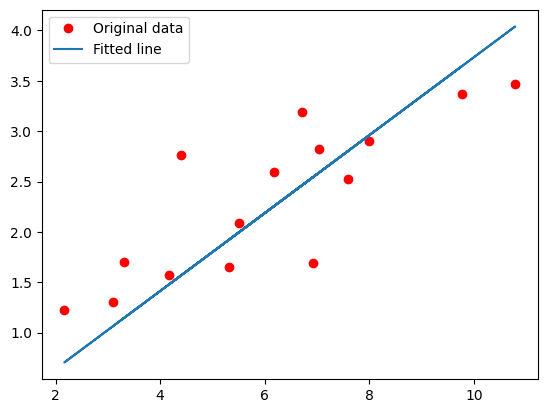

In [12]:
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [13]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')